In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
# Загружаем данные в переменную df из файла homework.csv

In [4]:
df = pd.read_csv("../Материалы_к_лекции_ML/homework.csv")

In [5]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
import matplotlib.pyplot as plt

In [7]:
# Построить scatter график по параметрам crim, medv

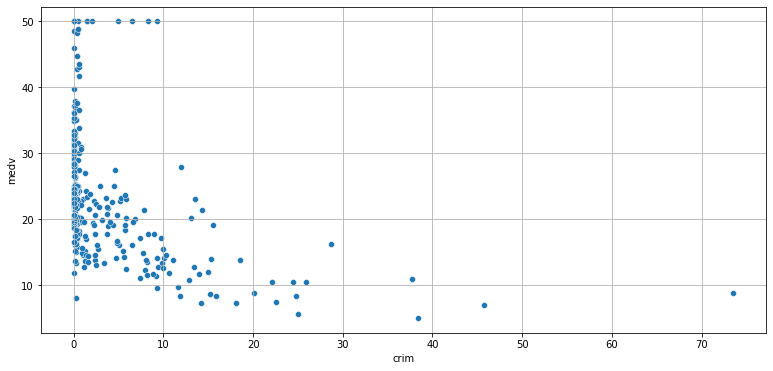

In [8]:
ax = sns.scatterplot(data = df,
                    x = df.crim,
                    y = df.medv)
ax.grid()

In [9]:
# Построить scatter график по параметрам rm, medv

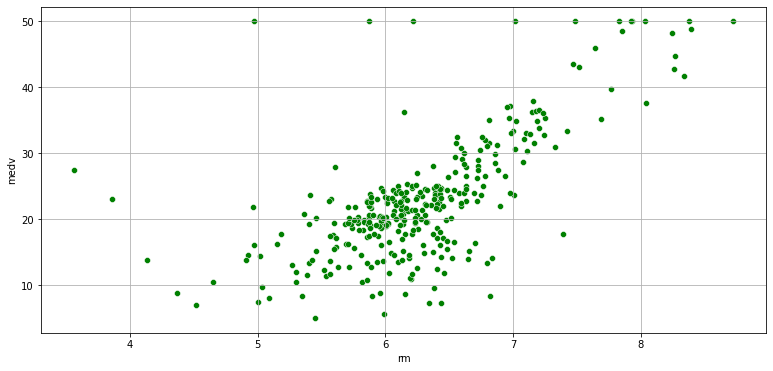

In [10]:
ax = sns.scatterplot(data = df,
                    x = df.rm,
                    y = df.medv,
                    color = 'g')
ax.grid()

In [11]:
# Сформировать X и y из df, выбрав нужные колонки

In [12]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [13]:
X, y = df.drop(['medv', 'ID'], axis=1), df.medv

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Разбить данные на данные для обучения и проверки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [17]:
# Создать и обучить модель LinearRegression

In [18]:
L_reg = LinearRegression()

In [19]:
L_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Оценить качество на тестовой выборки

In [21]:
mean_squared_error(y_test, L_reg.predict(X_test))

29.447160249279964

Пытался найти объем тестовой выборки, при которой будет минимальный MSR  
Но он как то сильно скачет и не пойму что не так

In [24]:
for i in np.arange(0.1, 0.21, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
    L_reg = LinearRegression()
    L_reg.fit(X_train, y_train)
    MSR = mean_squared_error(y_test, L_reg.predict(X_test), squared=False)
    print(round(i, 3), round(MSR, 2))

0.1 4.96
0.11 3.76
0.12 4.24
0.13 4.6
0.14 6.03
0.15 5.22
0.16 3.6
0.17 5.42
0.18 5.15
0.19 5.51
0.2 5.68
